<a href="https://colab.research.google.com/github/luisam19/course_optimizacion/blob/main/3_Ejemplo_asignacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplo asignación en Pyomo

Este cuaderno ejemplifica la implementación de modelos de asignación haciendo uso de Pyomo (Hart et al, 2011). Además a traves de este ejemplo se ilustrará el acceso a otro tipo de optimizadores (comerciales y no comerciales) a traves de NEOS (Dolan et al, 2002). Para la implementación de este mismo modelo de optimización en XpressMP usando MOSEL y en el Solver de Excel, te invitamos a revisar los ejemplos resueltos incluidos en el material de la segunda unidad de aprendizaje







# Ejemplo: Estructura de asignación (tomado de Bronson, 1983)

Un bufete de abogados ha aceptado cinco nuevos casos, cada uno de los cuales puede ser llevado adecuadamente por cualquiera de los cinco asociados más recientes. Debido a la diferencia de experiencia y práctica, los abogados emplearían distintos tiempos en los casos. Uno de los asociados más experimentados ha estimado las necesidades de tiempo, en horas, de cada abogado para cada caso como sigue:



|   |Caso 1  |Caso 2  | Caso 3  | Caso 4  | Caso 5|
|-------|----|----|----|----|----|
| **Abogado 1** | 145 | 122 | 130 | 95 | 115|
| **Abogado 2** | 80  |	63	|  85	| 48 | 78 |
| **Abogado 3** | 121	|107	|  93	| 69 | 95 |
| **Abogado 4** | 118 |	83	| 116	| 80 |105 |
| **Abogado 5** | 97	| 75	| 120	| 80 |111 |


Vamos a formular un modelo de optimización que le ayude al abogado coordinador a asignar los casos de manera que el número total de horas invertidas sea mínimo. Todos los casos deben ser asignados y ningún abogado puede tener más de un caso asignado.

Para ello seguiremos los 5 pasos del proceso de modelación:

1.   Definición de elementos y notación
2.   Verbalización
3.   Formulación del modelo descrito en la verbalización del paso 2, usando la notación y elementos definidos en el paso 1
4. Solución con software de optimización, en este caso  Pyomo
5. Interpretación de la solución  



#1. Notación y formulación

Para formular este modelo iniciamos definiendo la notación necesaria:

**Conjuntos**

> Abogados: A={A1, A2, A3, A4, A5}

> Casos : C={C1, C2, C3, C4, C5}

**Parámetros**
> $t_{ij}$: tiempo necesario por el abogado $i \in A$ para abordar el caso $j \in C$  [horas]

**Variables de decisión**

> $x_{ij}$: Variable binaria, $x_{ij}=1$ si se asigna el abogado $ i \in A$ al caso $ j \in C$. $x_{ij}=0$ si no se asigna.


#2. Verbalización

Ahora, expresamos en palabras el modelo que queremos constuir, declarando explicitamente su <font color='blue'>función objetivo</font>,<font color='red'> restricciones</font> y <font color='green'>decisiones</font>:

<font color='green'>Decidir qué abogado asignar a cada caso, </font> <font color='red'> cumpliendo que todos los casos deben ser atendidos por un abogado (demanda) y ningún abogado debe ser asignado a más de un caso (recurso) </font> <font color='blue'>, para minimizar el número total de horas invertidas.</font>


# 3. Formulación

Ahora, usando la notación de 1. y la verbalización de 2. tenemos el siguiente modelo de optimización que permitirá planear óptimamente la asignación de los casos en el bufete de abogados.

>$\text{min}\ TiempoTotal = \sum_{i \in A}\sum_{j \in C}t_{ij}x_{ij} $    (<font color='blue'> Total de horas invertidas </font>)

$sujeto \, a:$

>$\sum_{i \in A}x_{ij}= 1, \quad \forall j \in C \quad$(<font color='red'> Todos los casos deben ser atendidos por un abogado (demanda)  </font>)

>$\sum_{j \in C}x_{ij}\leq 1, \quad \forall i \in A \quad$(<font color='red'> Ningún abogado debe ser asignado a más de un caso (recurso)  </font>)

> $x_{ij} \in \{ 0, 1\} \quad \forall i \in A, \forall j \in C \quad $(<font color='green'>Dominio de las variables - binarias- </font>)



# 4. Implementación computacional

Ahora usaremos un modelo abstracto de pyomo para implemetar este modelo de optimización.

Primero es necesario instalar Pyomo y el optimizador (solver); en este caso usaremos el servicio gratuito de optimización en la nube  que ofrece [NEOS](https://neos-server.org/neos/solvers/index.html), con el cual tenemos acceso a muchos optimizadores lineales, no lineales, comerciales, no comerciales, etc. En este caso usaremos el optimizador comercial [Cplex](https://www.ibm.com/co-es/analytics/cplex-optimizer) de IBM, el cual es uno de los optimizadores más eficientes que hay en el mercado. Para que NEOS pueda enviar los resultados una vez resuelto el modelo es necesario especificar un correo electrónico válido. Para indicar NEOS como solucionador y el correo adecuado usamos las siguientes líneas:

>NEOS

$\texttt{solver_manager = SolverManagerFactory('neos')}$
$\texttt{os.environ['NEOS_EMAIL'] = 'usuario@udea.edu.co'}$


In [ ]:
# install pyomo and import libraries
!pip install -q pyomo
from pyomo.environ import *
from pyomo.opt import *
import os


# Establecer NEOS  como servicio para el solucionador
solver_manager = SolverManagerFactory('neos')
# Una dirección valida para ejecutar NEOS
os.environ['NEOS_EMAIL'] = 'juan.villegas@udea.edu.co' #Ponga su dirección de correo para una ejecución y visualización correcta de los resultados




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 KB 3.4 MB/s eta 0:00:00


# Modelo de optimización abstracto

**DEFINICIÓN DE LOS ELEMENTOS DEL MODELO**


Primero declaramos (computacionalmente) los elementos del modelo de optimización, de manera similar a como lo hicimos cuando definimos (matemáticamente) los elementos del modelo de optimización y su notación.


Para ello creamos el modelo con la instrucción: $\texttt{model = AbstractModel}$

Y luego le agregamos

>Conjuntos ($\texttt{Set})$

$\texttt{model.Abogados = Set(ordered = False)}$

$\texttt{model.Casos = Set(ordered = False)}$

>Parámetros ($\texttt{Param}$)

$\texttt{model.t = Param(model.Abogados, model.Casos, within=PositiveReals)}$

>Variables de decisión (binaria)

$\texttt{model.x = Var(model.Abogados, model.Casos, within=Binary)}$


In [ ]:
# Crear el modelo abstracto
model = AbstractModel()
#Notación
# Conjuntos: Abogados  y Casos
model.Abogados = Set(ordered = False)
model.Casos = Set(ordered = False)
#Parametros
#Tiempo que toma cada Abogado en cada caso
model.t = Param(model.Abogados, model.Casos, within=PositiveReals)
# Define variables
model.x = Var(model.Abogados, model.Casos, within=Binary)




**FORMULACION DEL MODELO ABSTRACTO**

Ahora que ya tenemos los elementos del modelo le agregamos la función objetivo y las restricciones:

>Función objetivo ($\texttt{Objective}$):

$\texttt{def time_rule(model):}$

 $\quad\texttt{return sum(model.t[i,j] * model.x[i,j] for i in model.Abogados for j in model.Casos)}$

$\texttt{model.tiempo_total = Objective(sense=minimize, rule=time_rule)}$

>Restricciones ($\texttt{Constraint}$)

*Todos los casos deben ser atendidos por un abogado (demanda)*:

$\texttt{def req_rule(model, j):}$

  $\quad\texttt{return sum(model.x[i,j] for i in model.Abogados)=1}$
  
$\texttt{model.req_rule = Constraint(model.Casos,rule=req_rule)}$

*Ningún abogado debe ser asignado a más de un caso (recurso)*:

$\texttt{def disp_rule(model, i):}$

  $\quad\texttt{return sum(model.x[i,j] for j in model.Casos)<=1}$

$\texttt{model.disp_rule = Constraint(model.Abogados,rule=disp_rule)}$





In [ ]:
# Función objetivo - costo total
def time_rule(model):
  return sum(model.t[i,j] * model.x[i,j] for i in model.Abogados for j in model.Casos)
model.tiempo_total = Objective(sense=minimize, rule=time_rule)

# Restriccion de requerimiento de los casos
def req_rule(model, j):
  return sum(model.x[i,j] for i in model.Abogados) == 1
model.req_rule = Constraint(model.Casos,rule=req_rule)

# Restriccion de disponibilidad de los abogados
def disp_rule(model, i):
  return sum(model.x[i,j] for j in model.Casos)<=1
model.disp_rule = Constraint(model.Abogados,rule=disp_rule)


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# Lectura de datos

Ahora, vamos a utilizar el archivo $\texttt{abogados.dat}$ para leer los tiempos de la tabla 1. El archivo está disponible en el material del curso.
Para elegir y subir el archivo, y así cargarlo en el espacio de almacenamiento de sesión del Notebook, tenemos dos opciones básicas:

Aquí usaremos la opción $\texttt{files.upload()}$


También podemos usar el botón de subida de archivos de la izquierda del notebook 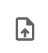.

En ambos casos se abre un cuadro de diálogo que nos permite subir el archivo.


In [ ]:
from google.colab import files

files.upload()


Saving abogados.dat to abogados.dat


{'abogados.dat': b'#Data file para el ejemplo de la refineria de petroleo\r\n\r\nset Casos := C1 C2 C3 C4 C5; \r\nset Abogados := A1 A2 A3 A4 A5;\r\n\r\nparam t:=\r\n A1 C1 145\r\n A1 C2 122\r\n A1 C3\t130\r\n A1 C4\t95\r\n A1 C5\t115\r\n A2 C1  80\r\n A2 C2\t63\r\n A2 C3\t85\r\n A2 C4\t48\r\n A2 C5\t78\r\n A3 C1 121\r\n A3 C2 107\r\n A3 C3\t93\r\n A3 C4\t69\r\n A3 C5\t95\r\n A4 C1 118\r\n A4 C2\t83\r\n A4 C3\t116\r\n A4 C4\t80\r\n A4 C5\t105\r\n A5 C1  97\r\n A5 C2  75\r\n A5 C3 120\r\n A5 C4\t80\r\n A5 C5\t111\r\n;    \r\n'}

# Instanciación del modelo abstracto y solución

Ahora, (i) combinamos el modelo abstracto  y los datos para la creación de una instancia particular del problema de optimización, y asi poder (ii) enviar la instancia del modelo resultante al  solucionador  (NEOS en este caso):

>Instanciación

Luego de haber creado el modelo Abstracto $\texttt{AbstractModel}$ se utiliza una realización de los datos ($\texttt{abogados.dat}$) para construir una instancia particular del modelo:  
($\texttt{instance = model.create_instance('abogados.dat')}$)

>Solución

Una vez creada la instancia se le pasa al optimizador para que resuelva el problema, usando para ello el optimizador [CPLEX] en NEOS.

($\texttt{solver_manager.solve(instance, opt='cplex')}$)



In [ ]:
# Crea una instancia del modelo abstracto

instance = model.create_instance('abogados.dat')
# resuleve la instancia
solver_manager.solve(instance, opt='cplex')





{'Problem': [{'Lower bound': -inf, 'Upper bound': inf, 'Number of objectives': 1, 'Number of constraints': 10, 'Number of variables': 25, 'Sense': 'unknown'}], 'Solver': [{'Status': 'ok', 'Message': 'CPLEX 20.1.0.0\\x3a optimal integer solution; objective 436; 4 MIP simplex iterations; 0 branch-and-bound nodes', 'Termination condition': 'optimal', 'Id': 2}], 'Solution': [OrderedDict([('number of solutions', 0), ('number of solutions displayed', 0)])]}

 # 5 Interpretación de la solución

Finalmente, después de haber  resuelto la problema de optimización,  recuperamos los resultados de las variables de decisión y la función objetivo óptima.

 >Impresión de resultados

Para visualizar los resultados usaremos la función $\texttt{value()}$, la cual permite acceder y calcular el valor de distintos componentes de los modelos de Pyomo; por ejemplo, las variables: $\texttt{value(instance.x[i,j])}$, o la función objetivo: $\texttt{value(instance.tiempo_total)}$  





In [ ]:
#Impresion de resultados
print("La solución optima toma " + str(value(instance.tiempo_total)) + " horas, la asignación es la siguiente")
for i in instance.Abogados:
  for j in instance.Casos:
    if(value(instance.x[i,j]>0)):
      print("El abogado " + i + " esta asignado al caso " + j + " con un tiempo de " + str(instance.t[i,j]) + " horas")

La solución optima toma 436.0 horas, la asignación es la siguiente
El abogado A2 esta asignado al caso C4 con un tiempo de 48 horas
El abogado A3 esta asignado al caso C3 con un tiempo de 93 horas
El abogado A4 esta asignado al caso C2 con un tiempo de 83 horas
El abogado A1 esta asignado al caso C5 con un tiempo de 115 horas
El abogado A5 esta asignado al caso C1 con un tiempo de 97 horas


# Referencias bibliográficas

Bronson, R. (1983). *Teorías y problemas de investigación de operaciones* (M. de L. Fournier, Trad.; Vol. 1). McGraw-Hill.

Dolan, E. D., Fourer, R., Moré, J. J., & Munson, T. S. (2002). Optimization on the NEOS server. *SIAM News*, 35(6), 4.

Hart, W. E., Watson, J. P., & Woodruff, D. L. (2011). Pyomo: modeling and solving mathematical programs in Python. *Mathematical Programming Computation*, 3(3), 219-260. https://doi.org/10.1007/s12532-011-0026-8





